In [3]:
# check if directory exits

import os

# Define the absolute directory path
image_dir = '/scratch/nf33/bz5571/BZplots/25/'

# Check if the directory exists
if os.path.exists(image_dir):
    print(f"The directory exists: {image_dir}")
else:
    print(f"The directory does NOT exist: {image_dir}")


The directory exists: /scratch/nf33/bz5571/BZplots/25/


In [ ]:
from glob import glob

# List all files in the directory and subdirectories
all_files = glob(os.path.join(image_dir, '**/*.*'), recursive=True)

print(f"Total files found: {len(all_files)}")
print(all_files[:10])  # Print the first 10 file paths to check


In [11]:
import os
import math
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory path
image_dir = '/scratch/nf33/bz5571/BZplots/Ca-Sr-K-DH'

# Increase the maximum image pixels allowed (set a higher limit if needed)
Image.MAX_IMAGE_PIXELS = None  # Remove the limit completely, but use with caution

# Retrieve all PNG image paths
image_paths = glob(os.path.join(image_dir, '**/*.jpg'), recursive=True)

# Load images into a list
images = []
for path in image_paths:
    if os.path.isfile(path):  # Ensure the path is a file
        try:
            img = Image.open(path)
            images.append(img)
        except Exception as e:
            print(f"Error loading image {path}: {e}")
    else:
        print(f"Skipped directory: {path}")

print(f"Successfully loaded {len(images)} images.")


Successfully loaded 9 images.


In [8]:
import os
import math
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory path
image_dir = '/scratch/nf33/bz5571/BZplots/25'
# Increase the maximum image pixels allowed (set a higher limit if needed)
Image.MAX_IMAGE_PIXELS = None  # Remove the limit completely, but use with caution

# Retrieve all PNG image paths
image_paths = glob(os.path.join(image_dir, '**/*.jpg'), recursive=True)

# Create a mapping from file names to image paths
image_dict = {os.path.basename(path): path for path in image_paths}

# Define the desired order
# Replace these with your actual desired filenames or identifiers
desired_order = [
    '25_4X4-0-T-plot-Sr.jpg',
    '25_4X4-T-30-plot-Sr.jpg',
    '25_4X4-30-60-plot-Sr.jpg',
    '25_4X4-60-90-plot-Sr.jpg',
    '25_4X4-90-120-plot-Sr.jpg',
    '25_4X4-120-150-plot-Sr.jpg',
    '25_4X4-150-180-plot-Sr.jpg',
    '25_4X4-180-210-plot-Sr.jpg',
    '25_4X4-210-240-plot-Sr.jpg',
    '25_4X4-241-plot-Sr.jpg'
]

# Load images in the specified order
images = []
for filename in desired_order:
    if filename in image_dict:
        try:
            img = Image.open(image_dict[filename])
            images.append(img)
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    else:
        print(f"Image {filename} not found.")

print(f"Successfully loaded {len(images)} images in the desired order.")



Successfully loaded 10 images in the desired order.


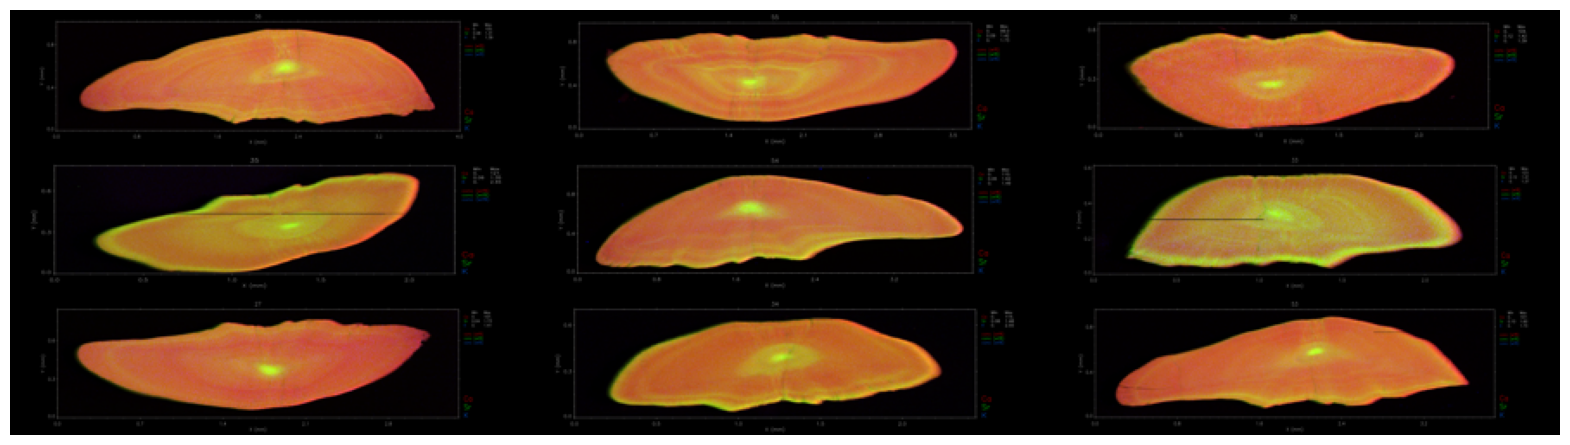

In [12]:
# Define the common size
common_size = (297, 80)

# Resize all images
resized_images = [img.resize(common_size) for img in images]

# Define grid parameters
images_per_row = 3  # Adjust as needed
padding = 3  # Adjust as needed

# Calculate grid size
num_images = len(resized_images)
rows = math.ceil(num_images / images_per_row)
grid_width = images_per_row * common_size[0] + (images_per_row - 1) * padding
grid_height = rows * common_size[1] + (rows - 1) * padding

# Create grid image
grid_image = Image.new('RGB', (grid_width, grid_height), color='black')

# Paste images into grid
for idx, img in enumerate(resized_images):
    row = idx // images_per_row
    col = idx % images_per_row
    x = col * (common_size[0] + padding)
    y = row * (common_size[1] + padding)
    grid_image.paste(img, (x, y))

# Display the grid image
plt.figure(figsize=(20, rows * 4))
plt.imshow(grid_image)
plt.axis('off')
plt.show()



In [13]:
grid_image.save('/scratch/nf33/bz5571/367_Ca-Sr-K-together.png', dpi=(600, 600))

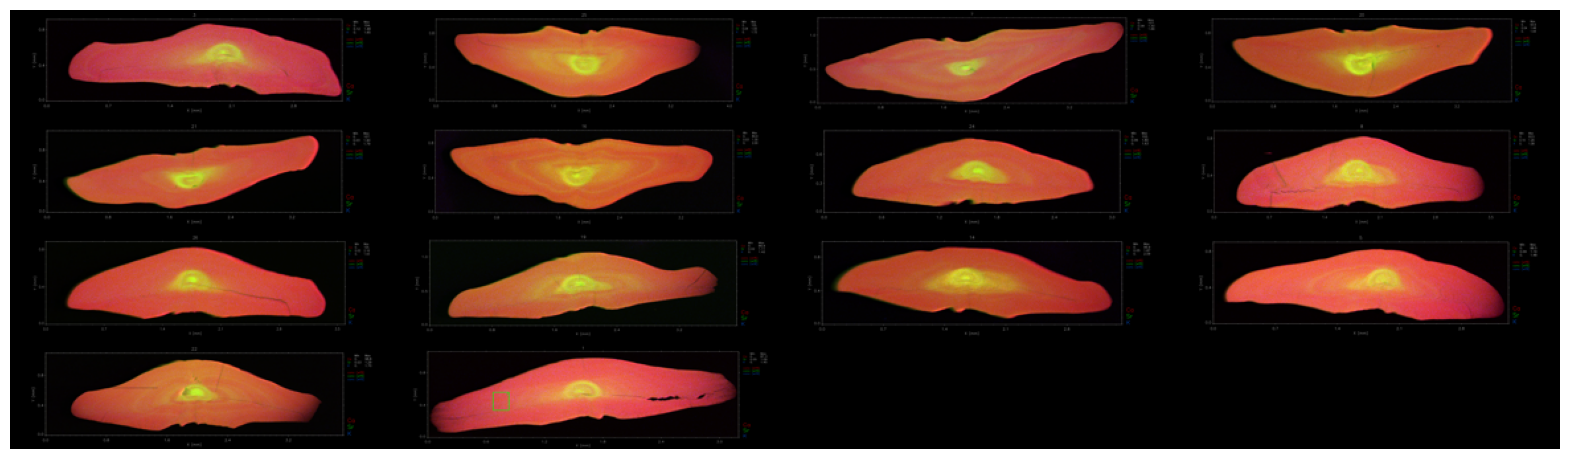

In [2]:
# Define the common size
common_size = (290, 80)

# Resize all images
resized_images = [img.resize(common_size) for img in images]

# Define grid parameters
images_per_row = 4  # Adjust as needed
padding = 4  # Adjust as needed

# Calculate grid size
num_images = len(resized_images)
rows = math.ceil(num_images / images_per_row)
grid_width = images_per_row * common_size[0] + (images_per_row - 1) * padding
grid_height = rows * common_size[1] + (rows - 1) * padding

# Create grid image
grid_image = Image.new('RGB', (grid_width, grid_height), color='black')

# Paste images into grid
for idx, img in enumerate(resized_images):
    row = idx // images_per_row
    col = idx % images_per_row
    x = col * (common_size[0] + padding)
    y = row * (common_size[1] + padding)
    grid_image.paste(img, (x, y))

# Display the grid image
plt.figure(figsize=(20, rows * 4))
plt.imshow(grid_image)
plt.axis('off')
plt.show()



In [3]:
# Save the grid image
grid_image.save('/scratch/nf33/bz5571/366_Ca-Sr-together.png', dpi=(600, 600))

In [ ]:
del img  # Delete the image object
gc.collect()
